In [701]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [702]:
df = pd.read_csv('train.csv')

In [703]:
df['group'] = df['PassengerId'].astype("string").str[0:4]
df['group'] = df['group'].astype('float32')

In [704]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280.0


In [705]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

In [706]:
df.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported',
 'group']

In [707]:
df = df.drop({'PassengerId', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'}, axis = 1)

In [708]:
cabins = df['Cabin'].unique()

In [709]:
df['floor'] = df['Cabin'].astype("string").str[0]

In [710]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Transported,group,floor
0,Europa,False,B/0/P,TRAPPIST-1e,False,1.0,B
1,Earth,False,F/0/S,TRAPPIST-1e,True,2.0,F
2,Europa,False,A/0/S,TRAPPIST-1e,False,3.0,A
3,Europa,False,A/0/S,TRAPPIST-1e,False,3.0,A
4,Earth,False,F/1/S,TRAPPIST-1e,True,4.0,F
...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,False,9276.0,A
8689,Earth,True,G/1499/S,PSO J318.5-22,False,9278.0,G
8690,Earth,False,G/1500/S,TRAPPIST-1e,True,9279.0,G
8691,Europa,False,E/608/S,55 Cancri e,False,9280.0,E


In [711]:
df = df.drop({'Cabin'}, axis = 1)

In [712]:
df

,HomePlanet,CryoSleep,Destination,Transported,group,floor
0,Europa,False,TRAPPIST-1e,False,1.0,B
1,Earth,False,TRAPPIST-1e,True,2.0,F
2,Europa,False,TRAPPIST-1e,False,3.0,A
3,Europa,False,TRAPPIST-1e,False,3.0,A
4,Earth,False,TRAPPIST-1e,True,4.0,F
...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,False,9276.0,A
8689,Earth,True,PSO J318.5-22,False,9278.0,G
8690,Earth,False,TRAPPIST-1e,True,9279.0,G
8691,Europa,False,55 Cancri e,False,9280.0,E


In [713]:
df.dropna(inplace=True)

In [714]:
df['Destination'].unique(), df['HomePlanet'].unique(), df['floor'].unique()


(array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object),
 array(['Europa', 'Earth', 'Mars'], dtype=object),
 <StringArray>
 ['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T']
 Length: 8, dtype: string)

In [715]:
# df = pd.get_dummies(df, columns = ['Destination', 'HomePlanet', 'floor'])
df['Destination'] = df['Destination'].astype('category').cat.codes
df['HomePlanet'] = df['HomePlanet'].astype('category').cat.codes
df['floor'] = df['floor'].astype('category').cat.codes

In [716]:
df

,HomePlanet,CryoSleep,Destination,Transported,group,floor
0,1,False,2,False,1.0,1
1,0,False,2,True,2.0,5
2,1,False,2,False,3.0,0
3,1,False,2,False,3.0,0
4,0,False,2,True,4.0,5
...,...,...,...,...,...,...
8688,1,False,0,False,9276.0,0
8689,0,True,1,False,9278.0,6
8690,0,False,2,True,9279.0,6
8691,1,False,0,False,9280.0,4


In [717]:
df.columns.tolist()

['HomePlanet', 'CryoSleep', 'Destination', 'Transported', 'group', 'floor']

In [718]:
df['CryoSleep'][0]

False

In [719]:
# # replacing False by 0 and True by 1
df = df.replace({True: 1, False: 0})

<ipython-input-719-0499f31742f0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [720]:
df['Transported'] #-> boolean data type

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [721]:
# X, y = df.drop(columns = ['Transported']), df['Transported']
# X = np.nan_to_num(X)
# y = np.nan_to_num(y)
# # X = tf.convert_to_tensor(X, dtype = tf.float32)
# # y = tf.convert_to_tensor(y, dtype = tf.float32)
# # X, y

In [722]:
# Check if any cell has NaN or Inf values
df.isna().sum() #+ ((df == np.inf) | (df == -np.inf)).sum()
df.dropna(inplace=True)
df = df.drop({'floor'}, axis = 1)
df

,HomePlanet,CryoSleep,Destination,Transported,group
0,1,0,2,0,1.0
1,0,0,2,1,2.0
2,1,0,2,0,3.0
3,1,0,2,0,3.0
4,0,0,2,1,4.0
...,...,...,...,...,...
8688,1,0,0,0,9276.0
8689,0,1,1,0,9278.0
8690,0,0,2,1,9279.0
8691,1,0,0,0,9280.0


In [723]:
df

,HomePlanet,CryoSleep,Destination,Transported,group
0,1,0,2,0,1.0
1,0,0,2,1,2.0
2,1,0,2,0,3.0
3,1,0,2,0,3.0
4,0,0,2,1,4.0
...,...,...,...,...,...
8688,1,0,0,0,9276.0
8689,0,1,1,0,9278.0
8690,0,0,2,1,9279.0
8691,1,0,0,0,9280.0


In [724]:
X, y = df.drop(columns = ['Transported']), df['Transported']
# X = np.nan_to_num(X)
# y = np.nan_to_num(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = scaler.transform(X)

# X = tf.convert_to_tensor(X, dtype = tf.float32)
# y = tf.convert_to_tensor(y, dtype = tf.float32)
X, y

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([[-0.30569933, -2.30419617, -1.037222  , -1.73766678],
        [-1.87402886, -2.30419617, -1.037222  , -1.73766664],
        [-0.30569933, -2.30419617, -1.037222  , -1.7376665 ],
        ...,
        [-1.87402886, -2.30419617, -1.037222  , -1.73636636],
        [-0.30569933, -2.30419617, -4.00602162, -1.73636622],
        [-0.30569933, -2.30419617, -1.037222  , -1.73636622]]),
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 8688    0
 8689    0
 8690    1
 8691    0
 8692    1
 Name: Transported, Length: 7920, dtype: int64)

In [725]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [726]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1), # 1 hidden layer
#     tf.keras.layers.Dense(1) # 1 output layer
# ])

# model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
#               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
#               metrics = ['accuracy']
# )

# model.fit(X, y, epochs = 100)

In [727]:
# drop_after_epochs = 8
def lr_scheduler(epochs):
  initial_lr = 0.01
  drop_rate = 1.1 # after fized number of epochs, lr = lr * drop rate
  drop_after_epochs = 20
  lr = initial_lr * ( drop_rate ** ( epochs//drop_after_epochs ))
  return lr

In [728]:
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation = 'relu'), # 1 hidden layer

    tf.keras.layers.Dense(64, activation = 'relu'), # 1 hidden layer
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(32, activation = 'relu'), # 1 hidden layer
    tf.keras.layers.Dropout(0.5),

    # tf.keras.layers.Dense(50, activation = 'relu'), # 2 hidden layer
    tf.keras.layers.Dense(1, activation = 'sigmoid') # 1 output layer
])


model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
              metrics = ['accuracy']
)

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
# drop_after_epochs = 8

# history = model_1.fit(X_train, y_train, epochs = 50, batch_size = 256) #, callbacks = [lr_schedule])
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5716 - loss: 0.7261 - val_accuracy: 0.7216 - val_loss: 0.5629
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7043 - loss: 0.5946 - val_accuracy: 0.7216 - val_loss: 0.5647
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7070 - loss: 0.5868 - val_accuracy: 0.7216 - val_loss: 0.5635
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7139 - loss: 0.5721 - val_accuracy: 0.7216 - val_loss: 0.5621
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7174 - loss: 0.5807 - val_accuracy: 0.7216 - val_loss: 0.5589
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.5704 - val_accuracy: 0.7216 - val_loss: 0.5603
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7255 - loss: 0.5730 - val_accuracy: 0.7216 - val_loss: 0.5591
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7139 - loss: 0.5717 - val_accuracy: 0.7216 - 

In [729]:
accuracy = history.history['accuracy']

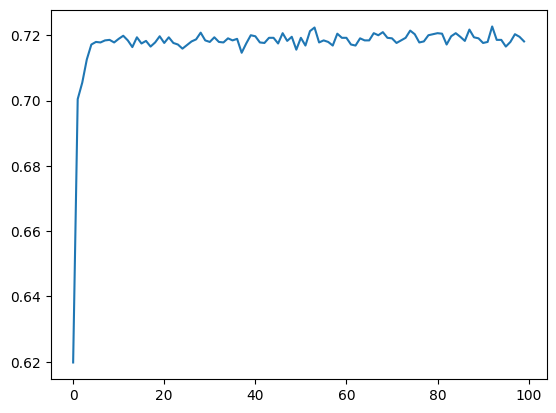

In [730]:
plt.plot(accuracy)
plt.show()

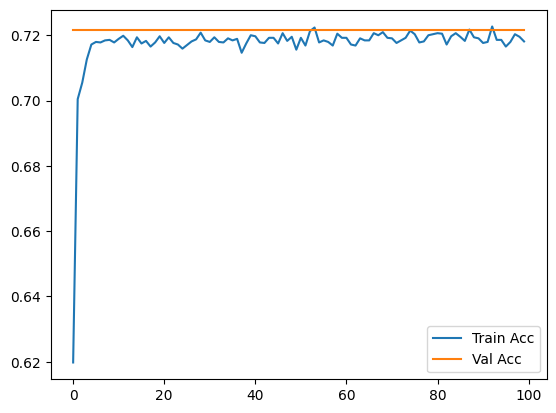

In [731]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

In [732]:
model_1.evaluate(X_test, y_test)
# np.isnan(X_test).sum()


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7117 - loss: 0.5467


[0.5456318855285645, 0.7215909361839294]

In [733]:

def lr_scheduler(epochs):
  initial_lr = 0.01
  drop_rate = 1.1 # after fixed number of epochs, lr = lr * drop rate
  drop_after_epochs = 20
  lr = initial_lr * ( drop_rate ** ( epochs//drop_after_epochs ))
  return lr

In [734]:
model_2 = tf.keras.Sequential([

    tf.keras.layers.Dense(40, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'), # 1 hidden layer
    # tf.keras.layers.Dense(2, activation = 'relu'), # 2 hidden layer
    # tf.kerivation = 'relu'), # 2 hidden layer
    tf.keras.layers.Dense(1, activation = 'sigmoid') # 1 output layer
])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ['accuracy']
)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
history = model_2.fit(X, y, epochs = 50, batch_size = 256, callbacks = [lr_schedule])
# history = model_2.fit(X, y, epochs = 150)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7009 - loss: 0.5865 - learning_rate: 0.0100
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7203 - loss: 0.5487 - learning_rate: 0.0100
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7140 - loss: 0.5601 - learning_rate: 0.0100
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7182 - loss: 0.5502 - learning_rate: 0.0100
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7145 - loss: 0.5561 - learning_rate: 0.0100
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7296 - loss: 0.5395 - learning_rate: 0.0100
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7218 - loss: 0.5483 - learning_rate: 0.0100
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7172 - loss: 0.5518 - learning_rate: 0.0100
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7231 - loss: 0.5417 - learning_rate: 0.0100
Epoch 10/50
31/31 ━━━━━━━━━

In [735]:
accuracy = history.history['accuracy']

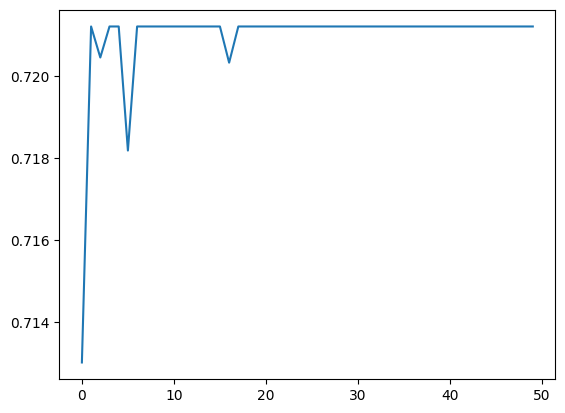

In [736]:
plt.plot(accuracy)
plt.show()